In [7]:
import pandas as pd
import numpy as np
import requests
import json

In [9]:
solar_url = 'https://power.larc.nasa.gov/api/temporal/daily/point?start=20111026&end=20201110&latitude=51.260197&longitude=4.402771&community=re&parameters=T2M%2CALLSKY_SFC_SW_DWN%2CRH2M%2CWS2M%2CPS%2CCLOUD_AMT&format=json&user=Research&header=true&time-standard=lst'

response = requests.get(url=solar_url, verify=True, timeout=30.00)
content = json.loads(response.content.decode('utf-8'))

In [11]:
data = {
    'Solar_Irradiance': content['properties']['parameter']['ALLSKY_SFC_SW_DWN'],
    'Temperature_2m': content['properties']['parameter']['T2M'],
    'Relative_Humidity_2m': content['properties']['parameter']['RH2M'],
    'Wind_Speed_2M': content['properties']['parameter']['WS2M'],
    'Surface_Pressure': content['properties']['parameter']['PS'],
    'Cloud_Amount': content['properties']['parameter']['CLOUD_AMT']
}

In [13]:
solarDF = pd.DataFrame(data)
solarDF.index = pd.to_datetime(solarDF.index, format='%Y%m%d')

In [15]:
solarDF.head()

,Solar_Irradiance,Temperature_2m,Relative_Humidity_2m,Wind_Speed_2M,Surface_Pressure,Cloud_Amount
2011-10-26,1.98,9.46,87.73,4.13,100.93,49.97
2011-10-27,1.94,9.83,80.80,3.68,101.21,94.26
2011-10-28,1.97,12.29,88.43,1.38,102.09,58.30
2011-10-29,1.10,12.71,89.61,2.48,102.15,73.87
2011-10-30,1.21,12.42,92.93,2.98,102.01,61.33


In [17]:
print(solarDF.columns)

Index(['Solar_Irradiance', 'Temperature_2m', 'Relative_Humidity_2m',
       'Wind_Speed_2M', 'Surface_Pressure', 'Cloud_Amount'],
      dtype='object')


In [19]:
output_DF = pd.read_csv("PV_Elec_Gas3.csv")
output_DF_filtered = output_DF[['date', 'Cumulative_solar_power']]

In [21]:
output_DF_filtered.head()

,date,Cumulative_solar_power
0,26/10/2011,0.1
1,27/10/2011,10.2
2,28/10/2011,20.2
3,29/10/2011,29.6
4,30/10/2011,34.2


In [23]:
output_DF_filtered['date'] = pd.to_datetime(output_DF_filtered['date'], format='%d/%m/%Y')

C:\Users\simon\AppData\Local\Temp\ipykernel_22280\259644958.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output_DF_filtered['date'] = pd.to_datetime(output_DF_filtered['date'], format='%d/%m/%Y')


In [25]:
output_DF_filtered['Daily_solar_power'] = output_DF_filtered['Cumulative_solar_power'].diff()

C:\Users\simon\AppData\Local\Temp\ipykernel_22280\2211926935.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output_DF_filtered['Daily_solar_power'] = output_DF_filtered['Cumulative_solar_power'].diff()


In [27]:
output_DF_filtered.head()

,date,Cumulative_solar_power,Daily_solar_power
0,2011-10-26,0.1,NaN
1,2011-10-27,10.2,10.1
2,2011-10-28,20.2,10.0
3,2011-10-29,29.6,9.4
4,2011-10-30,34.2,4.6


In [29]:
output_DF_filtered['Daily_solar_power'] = output_DF_filtered['Daily_solar_power'].fillna(0.1)

C:\Users\simon\AppData\Local\Temp\ipykernel_22280\2291712674.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output_DF_filtered['Daily_solar_power'] = output_DF_filtered['Daily_solar_power'].fillna(0.1)


In [31]:
output_DF_filtered = output_DF_filtered.drop(columns = ['Cumulative_solar_power'])

In [33]:
solarDF = solarDF.reset_index()
solarDF.rename(columns={'index': 'date'}, inplace=True)

solarDF['date'] = pd.to_datetime(solarDF['date'], format='%Y-%m-%d')

In [35]:
merged_df = pd.merge(output_DF_filtered, solarDF, on='date', how='inner')

In [37]:
merged_df.head()

,date,Daily_solar_power,Solar_Irradiance,Temperature_2m,Relative_Humidity_2m,Wind_Speed_2M,Surface_Pressure,Cloud_Amount
0,2011-10-26,0.1,1.98,9.46,87.73,4.13,100.93,49.97
1,2011-10-27,10.1,1.94,9.83,80.80,3.68,101.21,94.26
2,2011-10-28,10.0,1.97,12.29,88.43,1.38,102.09,58.30
3,2011-10-29,9.4,1.10,12.71,89.61,2.48,102.15,73.87
4,2011-10-30,4.6,1.21,12.42,92.93,2.98,102.01,61.33


In [39]:
import matplotlib.pyplot as plt

In [40]:
import seaborn as sns

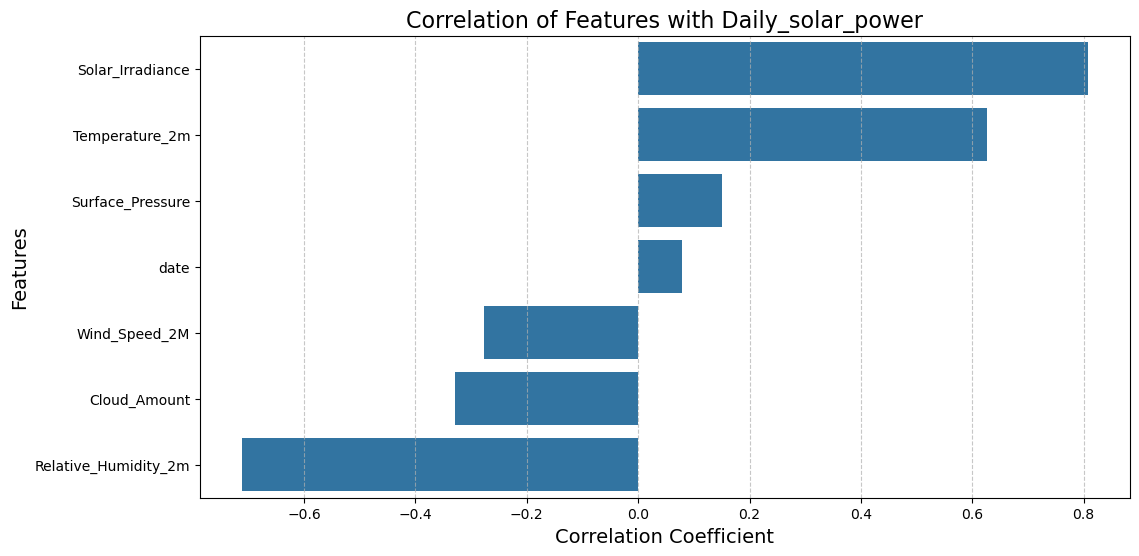

In [41]:
correlations = merged_df.corr()['Daily_solar_power'].sort_values(ascending=False)

correlations = correlations.drop('Daily_solar_power')

plt.figure(figsize=(12, 6))
sns.barplot(x=correlations.values, y=correlations.index)

plt.title('Correlation of Features with Daily_solar_power', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=14)
plt.ylabel('Features', fontsize=14)

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show() 

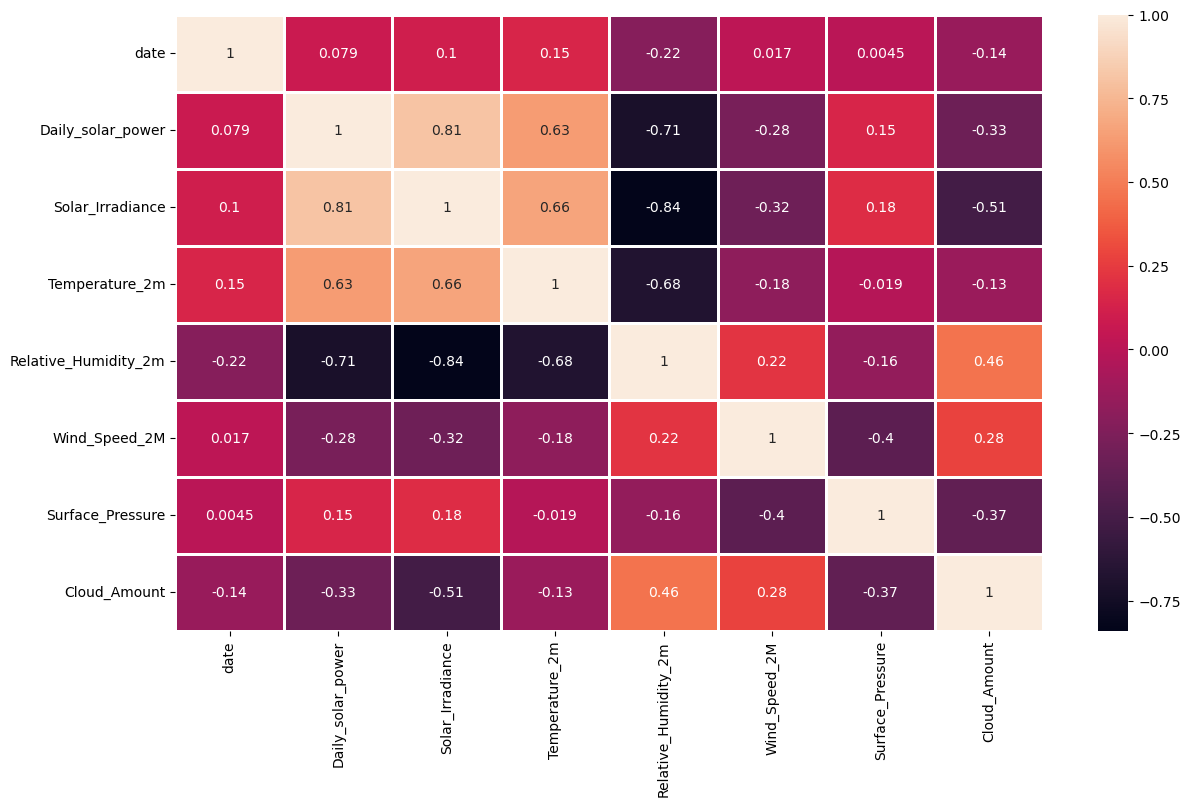

In [43]:
plt.figure(figsize=(14, 8))

sns.heatmap(merged_df.corr(), annot=True, linewidth =1)

plt.show() 

In [47]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [48]:
X = merged_df[['Solar_Irradiance', 'Temperature_2m', 'Relative_Humidity_2m', 'Wind_Speed_2M', 'Surface_Pressure', 'Cloud_Amount']]
y = merged_df['Daily_solar_power']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [49]:
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.001, max_depth=3, random_state=42)

gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [57]:
y_pred = gbr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [59]:
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 3.4051939820864283
Mean Squared Error (MSE): 20.12847459926347
R² Score: 0.6912369279642145


In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

cv_scores = cross_val_score(rf_model, X, y, cv=5)
print(f'Cross-Validation Scores: {cv_scores}')

Cross-Validation Scores: [0.62106179 0.64830268 0.68418721 0.68701537 0.66896204]


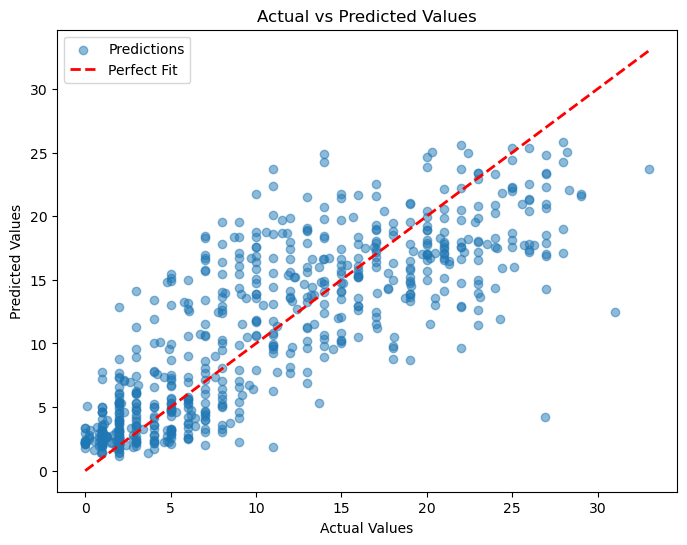

In [44]:
# Predictions from Random Forest model
y_pred_rf = rf_model.predict(X_test)

# Scatter plot for actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Perfect Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()

In [45]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 200],       
    'max_depth': [None, 10, 20],          
    'min_samples_split': [2, 5, 10],      
    'min_samples_leaf': [1, 2, 4]         
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=10,                
    cv=3,                     
    n_jobs=-1,                
    verbose=2,               
    random_state=42           
)

# Fit the random search model
random_search.fit(X_train, y_train)

# Display the best parameters and the best score
print("Best parameters:", random_search.best_params_)
print("Best CV score:", random_search.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 20}
Best CV score: 0.6695055115684997


                Feature  Importance
0      Solar_Irradiance    0.765625
5          Cloud_Amount    0.060870
1        Temperature_2m    0.056434
2  Relative_Humidity_2m    0.041187
4      Surface_Pressure    0.039052
3         Wind_Speed_2M    0.036832


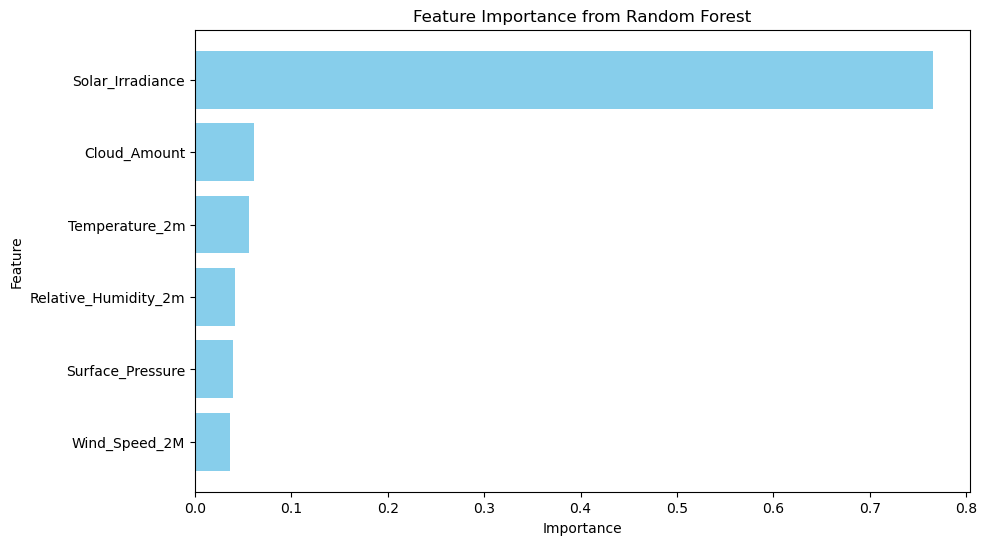

In [46]:
# Get feature importance from the best random forest model
best_rf_model = random_search.best_estimator_
feature_importances = best_rf_model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

# Plot 
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.show()


In [47]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
ann_model = MLPRegressor(hidden_layer_sizes=(200, 100), activation='relu', solver='adam', max_iter=4000, random_state=42)

In [49]:
ann_model.fit(X_train_scaled, y_train)

MLPRegressor(hidden_layer_sizes=(200, 100), max_iter=4000, random_state=42)

In [50]:
y_pred_ann = ann_model.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rmse_ann = np.sqrt(mean_squared_error(y_test, y_pred_ann))
r2_ann = r2_score(y_test, y_pred_ann)
mae = mean_absolute_error(y_test, y_pred_ann)

print(f"ANN Test Set RMSE: {rmse_ann}")
print(f"ANN Test Set MAE: {mae}")
print(f"ANN Test Set R-squared: {r2_ann}")

ANN Test Set RMSE: 4.85321873835171
ANN Test Set MAE: 3.7157601126234607
ANN Test Set R-squared: 0.6386947926867859


In [51]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Define the different hidden layers
hidden_layer_configs = [
    (100,),          
    (200, 100),      
    (50, 50),        
    (150, 100, 50),  
    (250,),          
    (100, 50)        
]

r2_scores = []
mse_values = []
best_model = None
best_score = float('-inf')
best_config = None

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Loop through each configuration
for config in hidden_layer_configs:
    # Create and train the model
    model = MLPRegressor(hidden_layer_sizes=config, activation='relu', solver='adam', max_iter=4000, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    # Calculate R-squared and MSE
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2_scores.append(r2)
    mse_values.append(mse)
    
    # Print results
    print(f"Hidden Layer Configuration: {config}")
    print(f"  R-squared: {r2}")
    print(f"  MSE: {mse}")
    
    # Update the best model
    if r2 > best_score:
        best_score = r2
        best_model = model
        best_config = config

# Print
print("\nBest Model Configuration:")
print(f"  Hidden Layer Sizes: {best_config}")
print(f"  R-squared: {best_score}")

Hidden Layer Configuration: (100,)
  R-squared: 0.6826943198581417
  MSE: 20.685373029962538
Hidden Layer Configuration: (200, 100)
  R-squared: 0.680564815563348
  MSE: 20.824196862826227
Hidden Layer Configuration: (50, 50)
  R-squared: 0.6857760714801611
  MSE: 20.484471546387876
Hidden Layer Configuration: (150, 100, 50)
  R-squared: 0.6826839343537217
  MSE: 20.68605006805695
Hidden Layer Configuration: (250,)
  R-squared: 0.6698157411486485
  MSE: 21.524936332398532
Hidden Layer Configuration: (100, 50)
  R-squared: 0.6853180128971904
  MSE: 20.51433269685354

Best Model Configuration:
  Hidden Layer Sizes: (50, 50)
  R-squared: 0.6857760714801611


In [61]:
import joblib

joblib.dump(gbr, "trained_gbr_model.pkl")
print("Model saved successfully!")

Model saved successfully!


In [54]:
import tkinter as tk
from tkinter import ttk
import pandas as pd
import joblib

# Load the trained GradientBoostingRegressor model
gbr = joblib.load("trained_gbr_model.pkl")

def predict_daily_solar_power():
    try:
        solar_irradiance = float(entry_solar_irradiance.get())
        temperature_2m = float(entry_temperature.get())

        # Default values for other features
        relative_humidity_2m = 8.0
        wind_speed_2m = 2.0
        surface_pressure = 3.0
        cloud_amount = 5.0

        # Combine inputs into a DataFrame
        user_input = pd.DataFrame([[solar_irradiance, temperature_2m, relative_humidity_2m,
                                    wind_speed_2m, surface_pressure, cloud_amount]],
                                   columns=['Solar_Irradiance', 'Temperature_2m', 'Relative_Humidity_2m',
                                            'Wind_Speed_2M', 'Surface_Pressure', 'Cloud_Amount'])

        # Use the trained model to predict
        prediction = gbr.predict(user_input)

        # Display the prediction in the label
        result_label.config(text=f"Predicted Daily Solar Power: {prediction[0]:.2f} kWh", foreground="white")
    except Exception as e:
        result_label.config(text=f"Error: {e}", foreground="red")

# Create the GUI window
window = tk.Tk()
window.title("Solar Power Prediction")
window.geometry("400x300")
window.resizable(False, False)
window.configure(bg="#333333")

# Title label
title_label = tk.Label(window, text="☀️ Solar Power Prediction ☀️", font=("Helvetica", 16, "bold"), bg="#333333", fg="white")
title_label.pack(pady=10)

# Input fields
frame = ttk.Frame(window)
frame.pack(pady=10)

label_solar_irradiance = ttk.Label(frame, text="Solar Irradiance:")
label_solar_irradiance.grid(row=0, column=0, padx=5, pady=5, sticky="w")
entry_solar_irradiance = ttk.Entry(frame, width=20)
entry_solar_irradiance.grid(row=0, column=1, padx=5, pady=5)

label_temperature = ttk.Label(frame, text="Temperature(°C):")
label_temperature.grid(row=1, column=0, padx=5, pady=5, sticky="w")
entry_temperature = ttk.Entry(frame, width=20)
entry_temperature.grid(row=1, column=1, padx=5, pady=5)

# Predict button
predict_button = ttk.Button(window, text="Predict", command=predict_daily_solar_power)
predict_button.pack(pady=10)

# Result label
result_label = tk.Label(window, text="", font=("Helvetica", 12), bg="#333333", fg="white")
result_label.pack(pady=10)

# Run the GUI loop
window.mainloop()


2025-02-17 21:53:28.298 python[98290:5212081] +[IMKClient subclass]: chose IMKClient_Modern
2025-02-17 21:53:28.298 python[98290:5212081] +[IMKInputSession subclass]: chose IMKInputSession_Modern
